# Tarea Semana 3: Fundamentos de python

Ejercicio 1
Escribir dos funciones que simulan una calculadora científica que permita calcular el seno, coseno, tangente, exponencial y logaritmo neperiano o natural (logaritmo en base euler). 
A.-La función uno preguntará al usuario el intervalo donde quiere aplicar la función matemática y la función a aplicar, y mostrará por pantalla una tabla donde la primera columna será los valores del intervalo dado (x) y la columna 2 tendrá los resultados de el resultado de aplicar la función a este intervalo (y).
B.-La función dos graficara con matplotlib el resultado de función anterior y la mostrará en pantalla. Recuerden poner los títulos ejes y demás configuraciones de las gráficas para que queden de la mejor manera posible.



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def _calculadora_cientifica():
    _funcion = input("¿Qué función matemática desea aplicar? (sin, cos, tan, exp, log) ")
    _inicio = float(input("Ingrese el inicio del intervalo: "))
    _fin = float(input("Ingrese el fin del intervalo: "))
    _incremento = .01
    _x,_y = _tabla(_funcion,_inicio,_fin,_incremento)
    _grafico(_funcion,_x,_y)


def _tabla(_funcion, _inicio, _fin, _incremento):

    _valores_x = np.arange(_inicio, _fin + _incremento, _incremento)
    funcion_dict = {
            "sin": np.sin,
            "cos": np.cos,
            "tan": np.tan,
            "exp": np.exp,
            "log": np.log
        }
    _valores_y = [funcion_dict[_funcion](x) for x in _valores_x]

    tabla = pd.DataFrame({"x": _valores_x, "y": _valores_y})
    print(tabla)
    return (_valores_x,_valores_y)


def _grafico(_funcion, _valores_x, _valores_y):

    plt.plot(_valores_x, _valores_y)
    plt.title(f"Grafico de {_funcion}(x)")
    plt.xlabel("Eje x")
    plt.ylabel("Eje y")
    plt.show()


¿Qué función matemática desea aplicar? (sin, cos, tan, exp, log) sin
Ingrese el inicio del intervalo: -5
Ingrese el fin del intervalo: 5
         x         y
0    -5.00  0.958924
1    -4.99  0.961713
2    -4.98  0.964405
3    -4.97  0.967001
4    -4.96  0.969501
...    ...       ...
996   4.96 -0.969501
997   4.97 -0.967001
998   4.98 -0.964405
999   4.99 -0.961713
1000  5.00 -0.958924

[1001 rows x 2 columns]


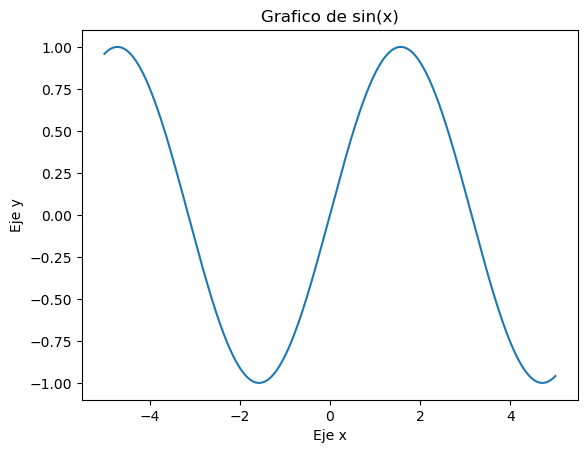

In [6]:
_calculadora_cientifica()


# Explicación
Se definio una funcion para pedir la información de la generación de los datos para posteriormente enviar los valores a la función de la tabla y generear los valores X y Y en la función grafico

# Ejercicio 2
Escribir un programa para ver los beneficios de una empresa en un periodo de años.
El programa debe cumplir los siguientes requisitos:

El programa tiene que preguntar al usuario por un año inicial y otro final, y después preguntar por los ingresos y egresos de cada año desde el año inicial hasta el año final.
Debe garantizar que por lo menos haya 5 años entre el año inicial y el final.
Con los datos introducidos se deben crear un dataframe, con las columnas fecha, ingresos y egresos.
El programa debe generar otra columna con el beneficio de cada año (ingresos menos egresos) y mostrarla por pantalla.
El programa debe crear otra columna llamada ganancia la cuál indique para cada año si ha habido beneficios o no de manera booleana y mostrarla por pantalla.
Finalmente el programa debe mostrar por pantalla la lista de los años con pérdidas.



In [12]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def pedir_datos():
    """Pide al usuario el año inicial, año final, ingresos y egresos de cada año"""
    while True:
        try:
            _anio_inicial = int(input("Ingrese el año inicial: "))
            _anio_final = int(input("Ingrese el año final: "))
            if _anio_final - _anio_inicial < 4:
                print("El período debe ser de al menos 5 años.")
                continue
            _datos = []
            for anio in range(_anio_inicial, _anio_final+1):
                _ingresos = float(input(f"Ingresos en {anio}: "))
                _egresos = float(input(f"Egresos en {anio}: "))
                _datos.append([anio, _ingresos, _egresos])
            return _datos
        except ValueError:
            print("Debe ingresar un número válido.")
        except KeyboardInterrupt:
            print("\nPrograma interrumpido.")
            return None

def crear_dataframe(datos):
    """Crea un DataFrame con los datos de ingresos, egresos y beneficios"""
    _df = pd.DataFrame(datos, columns=['Año', 'Ingresos', 'Egresos'])
    _df['Beneficios'] = _df['Ingresos'] - _df['Egresos']
    _df['Ganancia'] = _df['Beneficios'] > 0
    return _df

def mostrar_resultados(df):
    """Muestra los resultados en pantalla"""
    print("\nTabla de resultados:\n")
    print(df.to_string(index=False))
    _perdidas = df[df['Beneficios'] < 0]['Año'].tolist()
    if _perdidas:
        print(f"\nAños con pérdidas: {', '.join(map(str, _perdidas))}")
    else:
        print("\nNo hubo años con pérdidas.")
    plt.plot(df['Año'], df['Beneficios'])
    plt.title("Beneficios anuales")
    plt.xlabel("Año")
    plt.ylabel("Beneficio")
    plt.show()

def principal():
    _datos = pedir_datos()
    if _datos:
        _df = crear_dataframe(_datos)
        mostrar_resultados(_df)

Ingrese el año inicial: 2015
Ingrese el año final: 2020
Ingresos en 2015: 5
Egresos en 2015: 5
Ingresos en 2016: 5
Egresos en 2016: 5
Ingresos en 2017: 5
Egresos en 2017: 5
Ingresos en 2018: 5
Egresos en 2018: 5
Ingresos en 2019: 5
Egresos en 2019: 5
Ingresos en 2020: 7
Egresos en 2020: 5

Tabla de resultados:

 Año  Ingresos  Egresos  Beneficios  Ganancia
2015       5.0      5.0         0.0     False
2016       5.0      5.0         0.0     False
2017       5.0      5.0         0.0     False
2018       5.0      5.0         0.0     False
2019       5.0      5.0         0.0     False
2020       7.0      5.0         2.0      True

No hubo años con pérdidas.


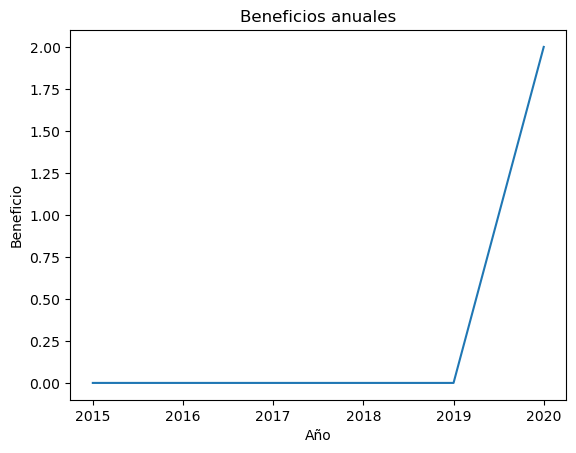

In [13]:
principal()

# Explicación
Se separo el ejercicio en 3 funciones, la primera (pedir_datos) se piden los datos al usuario en caso de que no sean al menos los 5 años muestra una validación y al cumplir esta validación pide los datos de los ingresos y egresos al usuario; la segunda (crear_dataframe) se genera el data frame con las cpolumnas año, ingresos y egresos; y la tercera (mostrar_resultados) se encarga de mostrar los resultados tabulares y grafica. 

# Ejercicio 3
El fichero horas-trabajo.csv contiene el número de horas mensuales trabajadas por los empleados de una empresa durante el primer cuatrimestre. Crear un programa que realice las siguientes operaciones utilizando la librería Pandas:
A.-Crea una columna con el número total de horas trabajadas para cada operador.
B.-Muestra cual es el promedio de horas trabajadas en total en la empresa durante el mes Marzo
C.-Muestra cuántos operadores hay por cada departamento de la empresa.
D.-Muestra el número de empleados que han trabajado todos los meses, es decir, que tienen un número de horas todos los meses del cuatrimestre.


In [14]:

import pandas as pd

_df = pd.read_csv('horas-trabajo.csv',sep=";",)

_df['Total Horas'] = _df['Enero'] + _df['Febrero'] + _df['Marzo'] + _df['Abril']

_promedio_marzo = _df['Marzo'].mean()

_operadores_por_departamento = _df['Departamento'].value_counts()

_empleados_completos = _df[_df['Enero'].notnull() & _df['Febrero'].notnull() & _df['Marzo'].notnull() & _df['Abril'].notnull()]

_num_empleados_completos = len(_empleados_completos)



print(_df)
print("Promedio de horas trabajadas en Marzo:", _promedio_marzo)
print("Número de operadores por departamento:")
print(_operadores_por_departamento)
print("Número de empleados que han trabajado todos los meses:", _num_empleados_completos)

     Id Departamento  Enero  Febrero  Marzo  Abril  Total Horas
0   OP1  Proveedores    180    160.0  140.0  180.0        660.0
1   OP2       Ventas    120    140.0    NaN  100.0          NaN
2   OP3       Ventas     80     90.0   80.0   80.0        330.0
3   OP5           IT    180    170.0  180.0  180.0        710.0
4   OP6    Marketing    100      NaN  100.0    NaN          NaN
5   OP7       Ventas    160    160.0  160.0  160.0        640.0
6   OP8  Proveedores    100     80.0  110.0   80.0        370.0
7   OP9           IT     80     80.0   80.0   80.0        320.0
8  OP10       Ventas    180    160.0  180.0  180.0        700.0
Promedio de horas trabajadas en Marzo: 128.75
Número de operadores por departamento:
Ventas         4
Proveedores    2
IT             2
Marketing      1
Name: Departamento, dtype: int64
Número de empleados que han trabajado todos los meses: 7


# Explicación
1.- Leer el archivo CSV
2.- Crear una columna con el total de horas trabajadas por cada operador
3.- Calcular el promedio de horas trabajadas en Marzo
4.- Contar el número de operadores por departamento
5.- Filtrar los empleados que han trabajado todos los meses del cuatrimestre (no se null)
6.- Mostrar los resultados

# Ejercicio 4
Crear un programa utilizando la librería Pandas y Matplotlib que realice lo siguiente:

A.-Crear el siguiente DataFrame indexado:

Dia Calorias Tiempo
Lunes, 420, 60 
Martes, 380, 40
Miercoles, 390, 75
Jueves, 490, 55
Viernes, 300, 45

B.-Calcular la media, mediana y desviación típica de ambas columnas.
C.-Añadir otra columna booleana al DataFrame para ver si se ha cumplido el reto de quemar más de 400 calorías por hora. La nueva columna debe generarse aplicando una fórmula a las otras columnas. 
D.-Filtrar el DataFrame y devolver otro DataFrame con las filas que cumplan que el número de calorías es mayor de 400.
E.-Añadir otra columna con los porcentajes de días que se ha conseguido el reto y los que no.
F.-Crear un gráfico donde se  muestre la progresión de las calorías y tiempo durante la semana.



Estadísticas de Calorías:
 mean      396.000000
median    390.000000
std        68.774995
Name: Calorias, dtype: float64

Estadísticas de Tiempo:
 mean      55.000000
median    55.000000
std       13.693064
Name: Tiempo, dtype: float64
Tabla general :
            Calorias  Tiempo  Reto Logrado  Porcentaje
Dia                                                  
Lunes           420      60          True       105.0
Martes          380      40         False        95.0
Miércoles       390      75         False        97.5
Jueves          490      55          True       122.5
Viernes         300      45         False        75.0
Tabla de días que se consiguio el reto:
         Calorias  Tiempo  Reto Logrado  Porcentaje
Dia                                               
Lunes        420      60          True       105.0
Jueves       490      55          True       122.5


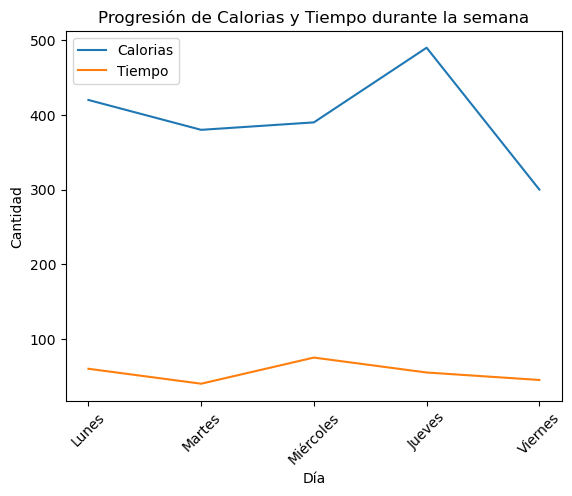

In [13]:

import pandas as pd
import matplotlib.pyplot as plt


_dias = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes"]

_data = {#'Dia':dias,
        'Calorias': [420, 380, 390, 490, 300],
        'Tiempo': [60, 40, 75, 55, 45]}

_df = pd.DataFrame(_data, index=_dias)
_df.index.name = 'Dia'


# Calcular media, mediana y desviación típica
_calorias_stats = _df['Calorias'].agg(['mean', 'median', 'std'])
_tiempo_stats = _df['Tiempo'].agg(['mean', 'median', 'std'])
print("\nEstadísticas de Calorías:\n", _calorias_stats)
print("\nEstadísticas de Tiempo:\n", _tiempo_stats)
# Añadir columna booleana del reto de quemar más de 400 calorías
_df['Reto Logrado'] = _df['Calorias']  > 400
_df['Porcentaje'] = (_df['Calorias']/400)*100

_df_filtrado = _df[_df['Calorias'] > 400]

print(f'Tabla general :\n {_df}')
print(f'Tabla de días que se consiguio el reto:\n {_df_filtrado}')


_fig, _ax = plt.subplots()

_ax.plot(_df['Calorias'], label='Calorias')
_ax.plot(_df['Tiempo'], label='Tiempo')
_ax.legend()
_ax.set_xlabel('Día')
_ax.set_ylabel('Cantidad')
_ax.set_title('Progresión de Calorias y Tiempo durante la semana')
plt.xticks(rotation=45)
plt.show()

# Explicación
1.- Crear el DataFrame
2.- Calcular la media, mediana y desviación 
3.- Añadir columna booleana
4.- Filtrar y devolver DataFrame con filas pares que cumplan condición
5.- Añadir columna de porcentajes
6.- Crear gráfico

# Ejercicio 5
El fichero coches.csv contiene información sobre los modelos de coches vendidos en USA durante un determinado año. 
Se pide:

A.-Crear un DataFrame a partir del fichero anterior.
B.-Eliminar las filas con valores desconocidos y mostrar el número de filas del DataFrame resultante.
C.-Crear una columna con el precio en euros (cambio 1$ = 0.94€)
D.-Mostrar las 10 últimas filas del DataFrame.
E.-Mostrar el número de marcas de coches que contiene el DataFrame.
F.-Mostrar el número de modelos de cada marca que hay en el DataFrame, de mayor a menor frecuencia.
G.-Mostrar cuál es la marca y el modelo del coche más caro.
H.-Mostrar el precio medio en euros de los coches agrupando por marca y ordenando de menor a mayor precio.
I.-Gráfica el diagrama de barras del porcentaje de modelos de cada marca.
J.-Gráfica el diagrama de dispersión de la potencia y el precio.


    Marca                            Modelo    Tipo  Potencia   Precio
0   Acura                               MDX     SUV     265.0  33337.0
1   Acura                    RSX Type S 2dr   Sedan     200.0  21761.0
2   Acura                           TSX 4dr   Sedan     200.0  24647.0
3   Acura                            TL 4dr   Sedan     270.0  30299.0
4   Acura                        3.5 RL 4dr   Sedan     225.0  39014.0
5   Acura           3.5 RL w/Navigation 4dr   Sedan     225.0  41100.0
6   Acura            NSX coupe 2dr manual S  Sports     290.0  79978.0
7    Audi                       A4 1.8T 4dr   Sedan     170.0  23508.0
8    Audi            A41.8T convertible 2dr   Sedan     170.0  32506.0
9    Audi                        A4 3.0 4dr   Sedan     220.0  28846.0
10   Audi         A4 3.0 Quattro 4dr manual   Sedan     220.0  30366.0
11   Audi           A4 3.0 Quattro 4dr auto   Sedan     220.0  31388.0
12   Audi                        A6 3.0 4dr   Sedan     220.0  33129.0
13   A

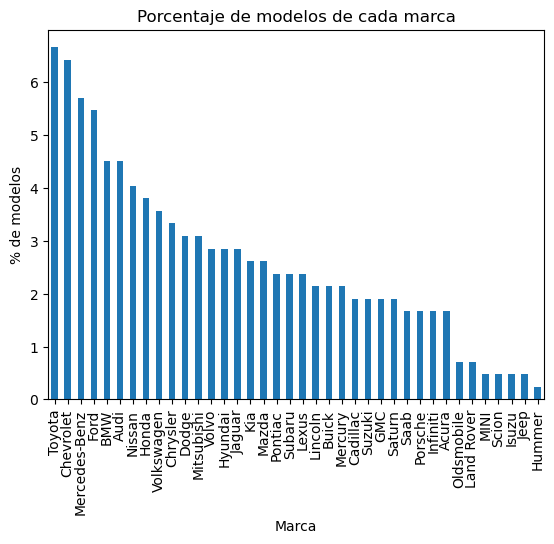

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# A 
_df = pd.read_csv('coches.csv', sep=';')
# mostrar el DataFrame
print(_df.head(50))

# B
_df = _df.dropna()
print(f"Número de filas: {len(_df)}")

# C

_df['Precio_Euros'] = _df['Precio'] * 0.94

#print(_df.head())

# D
print(_df.tail(10))

# E
_num_marcas = len(_df['Marca'].unique())
print(f"Número de marcas de coches: {_num_marcas}")

# F
_num_modelos = _df.groupby('Marca')['Modelo'].nunique().sort_values(ascending=False)
print(_num_modelos)

# G
_fila_precio_max = _df.loc[_df['Precio'].idxmax()]
print(f"El coche más caro es de la marca {_fila_precio_max['Marca']} y modelo {_fila_precio_max['Modelo']} con un precio ${_fila_precio_max['Precio']} ")

# H
_precio_medio = _df.groupby('Marca')['Precio_Euros'].mean().sort_values()
print(f'Precio medio:\n {_precio_medio}')


# I
_porcentaje_modelos = _num_modelos / len(_df) * 100

_porcentaje_modelos.plot(kind='bar')
plt.title('Porcentaje de modelos de cada marca')
plt.xlabel('Marca')
plt.ylabel('% de modelos')
plt.show()

# Explicación
# A cargar el archivo csv en un DataFrame

# B.-Eliminar las filas con valores desconocidos y mostrar el número de filas del DataFrame resultante.
eliminar filas con valores desconocidos

# C.-Crear una columna con el precio en euros 
$(cambio 1$ = 0.94€)
crear columna con precio en euro haciendo la operacion del precio regular por el factor de conversion

# D.-Mostrar las 10 últimas filas del DataFrame.
Solo se usa la instruccion tail con valor a 10

# E.-Mostrar el número de marcas de coches que contiene el DataFrame
contar el número de marcas de coches en el DataFrame y mostrar el número de marcas de coches


# F.-Mostrar el número de modelos de cada marca que hay en el DataFrame, de mayor a menor frecuencia.
Agrupar por marca y contar los modelos de cada marca y mostrar el número de modelos de cada marca

# G.-Mostrar cuál es la marca y el modelo del coche más caro.
obtener la fila con el precio máximo y mostrar la marca y el modelo del coche más caro

# H.-Mostrar el precio medio en euros de los coches agrupando por marca y ordenando de menor a mayor precio.
Agrupar por marca y calcular el precio medio en euros y mostrar


# I.-Gráfica el diagrama de barras del porcentaje de modelos de cada marca.
calcular el porcentaje de modelos de cada marca y generar el gráfico de barras